<div style="background-color:#0d1117; padding:30px; border-radius:10px; border-left:5px solid #58a6ff;">
<h1 style="color:#58a6ff; margin:0;">📋 To-Do List JavaScript - Complete Guide</h1>
<p style="color:#8b949e; font-size:16px; margin-top:10px;">Your Interactive Live Server Tutorial for <code style="background:#161b22; color:#3fb950; padding:3px 8px; border-radius:4px;">script.js</code></p>
<hr style="border-color:#161b22;">
<p style="color:#c9d1d9;">🎯 <b>What You'll Learn:</b> DOM Manipulation, Event Listeners, localStorage, Array Methods</p>
</div>

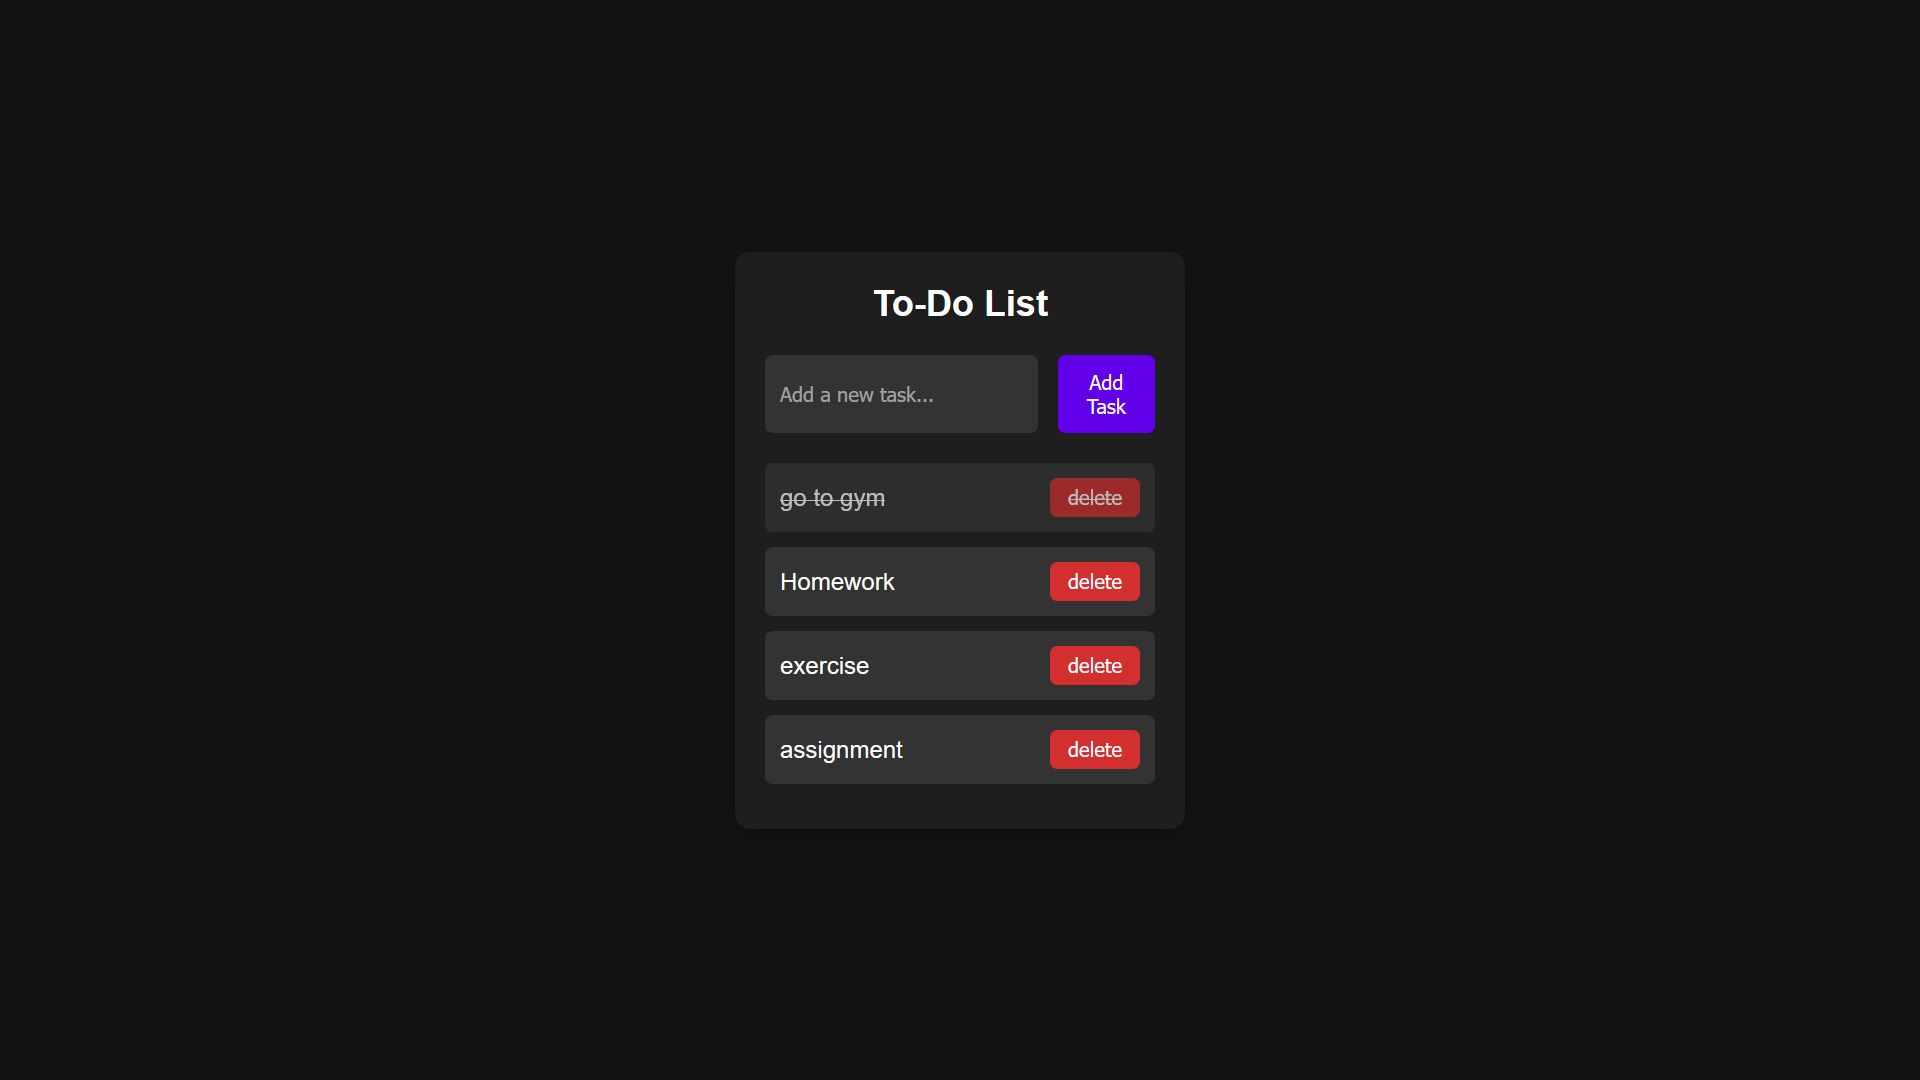

<div style="background-color:#161b22; padding:20px; border-radius:10px; margin-top:20px;">
<h2 style="color:#58a6ff;">📄 Your Complete Code</h2>

```javascript

document.addEventListener("DOMContentLoaded", () => {
  const todoInput = document.getElementById("todo-input");
  const addTaskButton = document.getElementById("add-task-btn");
  const todoList = document.getElementById("todo-list");
  let tasks = JSON.parse(localStorage.getItem("tasks")) || [];
  tasks.forEach((task) => renderTask(task));

  addTaskButton.addEventListener("click", () => {
    const taskText = todoInput.value.trim();
    if (taskText === "") return;
    const newTask = {
      id: Date.now(),
      text: taskText,
      completed: false,
    };
    tasks.push(newTask);
    saveTasks();
    renderTask(newTask);
    todoInput.value = "";
  });

  function renderTask(task) {
    const li = document.createElement("li");
    li.setAttribute("data-id", task.id);
    if (task.completed) li.classList.add("completed");
    li.innerHTML = `
    <span>${task.text}</span>
    <button>delete</button>
    `;
    li.addEventListener("click", (e) => {
      if (e.target.tagName === "BUTTON") return;
      task.completed = !task.completed;
      li.classList.toggle("completed");
      saveTasks();
    });
    li.querySelector("button").addEventListener("click", (e) => {
      e.stopPropagation();
      tasks = tasks.filter((t) => t.id !== task.id);
      li.remove();
      saveTasks();
    });
    todoList.appendChild(li);
  }

  function saveTasks() {
    localStorage.setItem("tasks", JSON.stringify(tasks));
  }
});
```
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #58a6ff;">
<h2 style="color:#58a6ff;">🔵 SECTION 1: The DOMContentLoaded Wrapper</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

```javascript
document.addEventListener("DOMContentLoaded", () => {
  // ALL your code lives inside here
});
```

<h3 style="color:#58a6ff;">🔵 What is this?</h3>
<p style="color:#c9d1d9;"><code style="background:#0d1117; color:#58a6ff; padding:2px 6px; border-radius:3px;">DOMContentLoaded</code> is an EVENT that fires when HTML is fully loaded and parsed.</p>

<h3 style="color:#58a6ff;">🔵 Why do we need it?</h3>
<table style="width:100%; color:#c9d1d9;">
<tr style="background:#0d1117;">
<td style="padding:10px;">📍 Your <code>script.js</code> might load BEFORE HTML elements exist</td>
</tr>
<tr style="background:#161b22;">
<td style="padding:10px;">📍 This wrapper WAITS until all HTML is ready</td>
</tr>
<tr style="background:#0d1117;">
<td style="padding:10px;">📍 Then runs your JavaScript safely</td>
</tr>
</table>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px; border-left:5px solid #a371f7;">
<h3 style="color:#a371f7;">🟣 MEMORY TRICK</h3>
<p style="color:#c9d1d9; font-size:18px;">Think of it like a <b>"Wait for the Stage"</b> rule 🎭</p>
<p style="color:#8b949e;">Actors (JavaScript) can't perform until the stage (HTML) is built!</p>
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #58a6ff;">
<h2 style="color:#58a6ff;">🔵 SECTION 2: Selecting DOM Elements</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

```javascript

const todoInput = document.getElementById("todo-input");     // Input field
const addTaskButton = document.getElementById("add-task-btn"); // Add button
const todoList = document.getElementById("todo-list");       // UL container
```

<h3 style="color:#58a6ff;">🔵 What's Happening?</h3>
<table style="width:100%; color:#c9d1d9; border-collapse:collapse;">
<tr style="background:#0d1117;">
<th style="padding:12px; text-align:left; border-bottom:2px solid #58a6ff;">Variable</th>
<th style="padding:12px; text-align:left; border-bottom:2px solid #58a6ff;">Grabs This HTML</th>
<th style="padding:12px; text-align:left; border-bottom:2px solid #58a6ff;">Purpose</th>
</tr>
<tr style="background:#161b22;">
<td style="padding:10px;"><code style="color:#3fb950;">todoInput</code></td>
<td style="padding:10px;"><code>&lt;input id="todo-input"&gt;</code></td>
<td style="padding:10px;">Where user types task</td>
</tr>
<tr style="background:#0d1117;">
<td style="padding:10px;"><code style="color:#3fb950;">addTaskButton</code></td>
<td style="padding:10px;"><code>&lt;button id="add-task-btn"&gt;</code></td>
<td style="padding:10px;">Click to add task</td>
</tr>
<tr style="background:#161b22;">
<td style="padding:10px;"><code style="color:#3fb950;">todoList</code></td>
<td style="padding:10px;"><code>&lt;ul id="todo-list"&gt;</code></td>
<td style="padding:10px;">Container for all tasks</td>
</tr>
</table>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px; border-left:5px solid #d29922;">
<h3 style="color:#d29922;">🟠 WHY <code>const</code> and not <code>let</code>?</h3>
<p style="color:#c9d1d9;">These elements NEVER change. The same input box, same button, same list.</p>
<p style="color:#c9d1d9;"><code style="color:#58a6ff;">const</code> = "This variable will always point to the SAME thing"</p>
<p style="color:#8b949e;">Using <code>let</code> would work, but <code>const</code> is better practice here!</p>
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #58a6ff;">
<h2 style="color:#58a6ff;">🔵 SECTION 3: Loading Tasks from localStorage</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

```javascript

let tasks = JSON.parse(localStorage.getItem("tasks")) || [];
tasks.forEach((task) => renderTask(task));
```

<h3 style="color:#58a6ff;">🔵 Let's Break This Down Step by Step</h3>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">Step 1: <code>localStorage.getItem("tasks")</code></h4>

```javascript

localStorage.getItem("tasks")
// Returns: '{"id":123,"text":"Buy milk","completed":false}' (a STRING)
// OR returns: null (if nothing saved)
```

<p style="color:#c9d1d9;">📍 <b style="color:#58a6ff;">localStorage</b> = Browser's permanent storage (survives refresh!)</p>
<p style="color:#c9d1d9;">📍 <b>getItem("tasks")</b> = Get whatever is saved under key "tasks"</p>
<p style="color:#d29922;">⚠️ Returns a <b>STRING</b>, not an array!</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">Step 2: <code>JSON.parse(...)</code></h4>

```javascript
JSON.parse('[{"id":1,"text":"Buy milk"}]')
// Returns: [{id: 1, text: "Buy milk"}] (a real ARRAY!)
```

<p style="color:#c9d1d9;">📍 Converts STRING → JavaScript Array/Object</p>
<p style="color:#c9d1d9;">📍 Think of it as "unwrapping" the data</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">Step 3: <code>|| []</code> (The Fallback)</h4>

```javascript
JSON.parse(localStorage.getItem("tasks")) || []
```

<table style="width:100%; color:#c9d1d9;">
<tr style="background:#161b22;">
<th style="padding:10px;">If localStorage has data:</th>
<td style="padding:10px;">Use that data ✅</td>
</tr>
<tr style="background:#0d1117;">
<th style="padding:10px;">If localStorage is empty (null):</th>
<td style="padding:10px;">Use empty array <code>[]</code> ✅</td>
</tr>
</table>

<p style="color:#a371f7;">🟣 <b>||</b> means "OR" - use the left side, but if it's null/undefined, use right side</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">Step 4: <code>tasks.forEach((task) => renderTask(task))</code></h4>

```javascript
tasks.forEach((task) => renderTask(task));
```

<p style="color:#c9d1d9;">📍 <b>forEach</b> = Loop through each item in the array</p>
<p style="color:#c9d1d9;">📍 For EACH task → call <code>renderTask()</code> to display it on screen</p>
<p style="color:#3fb950;">✅ This restores all your tasks when you refresh the page!</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px; border-left:5px solid #f85149;">
<h3 style="color:#f85149;">🔴 WHAT IF: You Remove <code>|| []</code>?</h3>

```javascript
// ❌ Without fallback
let tasks = JSON.parse(localStorage.getItem("tasks"));
tasks.forEach((task) => renderTask(task)); // 💥 CRASH!
```

<p style="color:#f85149;"><b>Error:</b> <code>Cannot read properties of null (reading 'forEach')</code></p>
<p style="color:#c9d1d9;">Because <code>null.forEach()</code> doesn't exist!</p>

<h4 style="color:#3fb950;">🟢 TRY THIS:</h4>
<ol style="color:#c9d1d9;">
<li>Clear localStorage: Open Console → <code>localStorage.clear()</code></li>
<li>Remove the <code>|| []</code> part</li>
<li>Refresh page → See the error!</li>
</ol>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px; border-left:5px solid #3fb950;">
<h3 style="color:#3fb950;">🟢 TRY THIS: See localStorage Live!</h3>
<ol style="color:#c9d1d9;">
<li>Open DevTools (F12)</li>
<li>Go to <b>Application</b> tab</li>
<li>Click <b>Local Storage</b> → your website</li>
<li>You'll see key <code>"tasks"</code> with JSON string!</li>
<li>Add a task → Watch it update in real-time!</li>
</ol>
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #58a6ff;">
<h2 style="color:#58a6ff;">🔵 SECTION 4: Add Task Button Logic</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

```javascript

addTaskButton.addEventListener("click", () => {
  const taskText = todoInput.value.trim();
  if (taskText === "") return;
  
  const newTask = {
    id: Date.now(),
    text: taskText,
    completed: false,
  };
  
  tasks.push(newTask);
  saveTasks();
  renderTask(newTask);
  todoInput.value = "";
});
```
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h3 style="color:#58a6ff;">🔵 Line-by-Line Breakdown</h3>

<h4 style="color:#3fb950;">Line 1: <code>addTaskButton.addEventListener("click", () => {...})</code></h4>
<p style="color:#c9d1d9;">📍 "When someone CLICKS the add button, run this function"</p>
<p style="color:#8b949e;">The <code>() => {...}</code> is an Arrow Function (a compact way to write functions)</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">Line 2: <code>const taskText = todoInput.value.trim()</code></h4>

```javascript
todoInput.value          // " Buy groceries  "
todoInput.value.trim()   // "Buy groceries" (removes extra spaces)
```

<p style="color:#c9d1d9;">📍 <code>.value</code> = Get what user typed in input</p>
<p style="color:#c9d1d9;">📍 <code>.trim()</code> = Remove spaces from start and end</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px; border-left:5px solid #f85149;">
<h4 style="color:#f85149;">🔴 WHAT IF: You Remove <code>.trim()</code>?</h4>

```javascript
const taskText = todoInput.value; // No trim
```

<p style="color:#c9d1d9;"><b>Result:</b> User can add tasks with only spaces: "   "</p>
<p style="color:#c9d1d9;">The <code>if (taskText === "")</code> check won't catch "   " (spaces)</p>

<h4 style="color:#3fb950;">🟢 TRY THIS:</h4>
<ol style="color:#c9d1d9;">
<li>Remove <code>.trim()</code></li>
<li>Type just spaces in input and click Add</li>
<li>Empty task gets added! 😱</li>
</ol>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">Line 3: <code>if (taskText === "") return;</code></h4>

```javascript
if (taskText === "") return; // STOP! Don't continue.
```

<p style="color:#c9d1d9;">📍 <b>Guard Clause</b> - If input is empty, EXIT the function immediately</p>
<p style="color:#c9d1d9;">📍 <code>return;</code> means "stop here, don't run the rest"</p>
<p style="color:#a371f7;">🟣 This prevents adding blank tasks!</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">Lines 4-8: Creating the Task Object</h4>

```javascript
const newTask = {
  id: Date.now(),        // 1703856000000 (unique timestamp)
  text: taskText,        // "Buy groceries"
  completed: false,      // Not done yet
};
```

<table style="width:100%; color:#c9d1d9;">
<tr style="background:#161b22;">
<th style="padding:10px;">Property</th>
<th style="padding:10px;">Value</th>
<th style="padding:10px;">Why?</th>
</tr>
<tr style="background:#0d1117;">
<td style="padding:10px;"><code>id</code></td>
<td style="padding:10px;"><code>Date.now()</code></td>
<td style="padding:10px;">Unique identifier (milliseconds since 1970)</td>
</tr>
<tr style="background:#161b22;">
<td style="padding:10px;"><code>text</code></td>
<td style="padding:10px;">User's input</td>
<td style="padding:10px;">The actual task content</td>
</tr>
<tr style="background:#0d1117;">
<td style="padding:10px;"><code>completed</code></td>
<td style="padding:10px;"><code>false</code></td>
<td style="padding:10px;">New tasks start as "not done"</td>
</tr>
</table>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px; border-left:5px solid #d29922;">
<h4 style="color:#d29922;">🟠 Why <code>Date.now()</code> for ID?</h4>
<p style="color:#c9d1d9;">Every task needs a UNIQUE ID to identify it for deletion.</p>

```javascript
console.log(Date.now()); // 1703856000000
// Wait 1 millisecond...
console.log(Date.now()); // 1703856000001 (different!)
```

<p style="color:#8b949e;">Since time always moves forward, each ID is unique!</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">Lines 9-12: Save, Render, Clear</h4>

```javascript
tasks.push(newTask);    // Add to array
saveTasks();            // Save to localStorage
renderTask(newTask);    // Show on screen
todoInput.value = "";   // Clear the input box
```

<p style="color:#58a6ff;">📍 <b>ORDER MATTERS!</b></p>
<ol style="color:#c9d1d9;">
<li>First add to array (data)</li>
<li>Then save to storage (persistence)</li>
<li>Then show on UI (visual)</li>
<li>Finally clear input (UX)</li>
</ol>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px; border-left:5px solid #f85149;">
<h4 style="color:#f85149;">🔴 WHAT IF: You Remove <code>saveTasks()</code>?</h4>

```javascript
tasks.push(newTask);
// saveTasks();  ← REMOVED
renderTask(newTask);
```

<p style="color:#c9d1d9;"><b>Result:</b></p>
<ul style="color:#c9d1d9;">
<li>Task appears on screen ✅</li>
<li>Refresh page → Task GONE! ❌</li>
</ul>
<p style="color:#8b949e;">Because it was never saved to localStorage!</p>
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #58a6ff;">
<h2 style="color:#58a6ff;">🔵 SECTION 5: The renderTask() Function</h2>
<p style="color:#8b949e;">This is the CORE function that creates the visual task element</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

```javascript
function renderTask(task) {
  const li = document.createElement("li");  // Create <li>
  li.setAttribute("data-id", task.id);      // Set data-id attribute
  if (task.completed) li.classList.add("completed"); // Add class if done
  
  li.innerHTML = `
    <span>${task.text}</span>
    <button>delete</button>
  `;
  
  // Event listeners here...
  
  todoList.appendChild(li); // Add to <ul>
}
```
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h3 style="color:#58a6ff;">🔵 Step-by-Step Breakdown</h3>

<h4 style="color:#3fb950;">1. <code>document.createElement("li")</code></h4>
<p style="color:#c9d1d9;">Creates a new <code>&lt;li&gt;</code> element in memory (not visible yet!)</p>

```javascript
const li = document.createElement("li");
// li now exists but is NOT on the page yet
```
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">2. <code>li.setAttribute("data-id", task.id)</code></h4>

```html
<!-- Result: -->
<li data-id="1703856000000">...</li>
```

<p style="color:#c9d1d9;">📍 <code>data-*</code> attributes store custom data on HTML elements</p>
<p style="color:#8b949e;">This links the DOM element to its data in the tasks array</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">3. <code>if (task.completed) li.classList.add("completed")</code></h4>

```javascript
// If task.completed is TRUE:
<li class="completed">...</li>  // Gets the class

// If task.completed is FALSE:
<li>...</li>  // No class added
```

<p style="color:#c9d1d9;">📍 Your CSS probably has <code>.completed { text-decoration: line-through; }</code></p>
<p style="color:#8b949e;">This restores the visual "done" state when reloading page</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">4. <code>li.innerHTML = `...`</code> (Template Literal)</h4>

```javascript
li.innerHTML = `
  <span>${task.text}</span>
  <button>delete</button>
`;
```

<p style="color:#58a6ff;"><b>Template Literal Features:</b></p>
<ul style="color:#c9d1d9;">
<li><code>`backticks`</code> = Multi-line strings allowed</li>
<li><code>${...}</code> = Insert JavaScript values (called interpolation)</li>
<li><code>${task.text}</code> becomes the actual task text</li>
</ul>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px; border-left:5px solid #f85149;">
<h4 style="color:#f85149;">🔴 WHAT IF: You Use Regular Quotes?</h4>

```javascript
// ❌ With regular quotes
li.innerHTML = "
  <span>${task.text}</span>
"; // SYNTAX ERROR! Can't do multi-line

// ❌ Also:
li.innerHTML = "<span>${task.text}</span>";
// Shows literally "${task.text}" instead of the value!
```

<p style="color:#a371f7;">🟣 <b>Remember:</b> Only backticks <code>`</code> support <code>${}</code> interpolation!</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#3fb950;">5. <code>todoList.appendChild(li)</code></h4>

```javascript
todoList.appendChild(li);
```

<p style="color:#c9d1d9;">📍 NOW the <code>&lt;li&gt;</code> is added to the <code>&lt;ul&gt;</code> and becomes VISIBLE!</p>

```html
<!-- Before: -->
<ul id="todo-list"></ul>

<!-- After: -->
<ul id="todo-list">
  <li data-id="1703856000000">
    <span>Buy groceries</span>
    <button>delete</button>
  </li>
</ul>
```
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #58a6ff;">
<h2 style="color:#58a6ff;">🔵 SECTION 6: Event Listeners Inside renderTask()</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h3 style="color:#3fb950;">Toggle Complete (Click on Task)</h3>

```javascript
li.addEventListener("click", (e) => {
  if (e.target.tagName === "BUTTON") return; // Skip if clicked on delete btn
  task.completed = !task.completed;          // Toggle true/false
  li.classList.toggle("completed");          // Toggle CSS class
  saveTasks();                               // Save change
});
```
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">🔵 Understanding <code>e.target.tagName</code></h4>

```javascript
li.addEventListener("click", (e) => {
  console.log(e.target);         // The EXACT element clicked
  console.log(e.target.tagName); // "LI", "SPAN", or "BUTTON"
});
```

<p style="color:#c9d1d9;">📍 <code>e</code> = Event object (contains info about the click)</p>
<p style="color:#c9d1d9;">📍 <code>e.target</code> = The specific element that was clicked</p>
<p style="color:#c9d1d9;">📍 <code>tagName</code> = Returns tag name in UPPERCASE</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">🔵 Why <code>if (e.target.tagName === "BUTTON") return;</code>?</h4>

<p style="color:#c9d1d9;">The <code>&lt;li&gt;</code> contains both the text AND the delete button:</p>

```html
<li>                           ← Clicking here toggles complete ✅
  <span>Buy milk</span>        ← Clicking here toggles complete ✅
  <button>delete</button>      ← Clicking here should DELETE, not toggle! ⚠️
</li>
```

<p style="color:#d29922;">🟠 Without this check, clicking delete would BOTH delete AND toggle!</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px; border-left:5px solid #f85149;">
<h4 style="color:#f85149;">🔴 WHAT IF: You Remove the BUTTON Check?</h4>

```javascript
li.addEventListener("click", (e) => {
  // if (e.target.tagName === "BUTTON") return; ← REMOVED
  task.completed = !task.completed;
  li.classList.toggle("completed");
  saveTasks();
});
```

<h4 style="color:#3fb950;">🟢 TRY THIS:</h4>
<ol style="color:#c9d1d9;">
<li>Remove that line</li>
<li>Click the delete button</li>
<li>Watch: Task gets strikethrough AND deleted at same time!</li>
</ol>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">🔵 Understanding <code>!task.completed</code></h4>

```javascript
task.completed = !task.completed;
```

<table style="width:100%; color:#c9d1d9;">
<tr style="background:#0d1117;">
<th style="padding:10px;">Before</th>
<th style="padding:10px;"><code>!</code> (NOT)</th>
<th style="padding:10px;">After</th>
</tr>
<tr style="background:#161b22;">
<td style="padding:10px;"><code>false</code></td>
<td style="padding:10px;">→</td>
<td style="padding:10px;"><code>true</code></td>
</tr>
<tr style="background:#0d1117;">
<td style="padding:10px;"><code>true</code></td>
<td style="padding:10px;">→</td>
<td style="padding:10px;"><code>false</code></td>
</tr>
</table>

<p style="color:#a371f7;">🟣 <b>!</b> flips boolean values - perfect for toggle behavior!</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h3 style="color:#3fb950;">Delete Task (Click Delete Button)</h3>

```javascript
li.querySelector("button").addEventListener("click", (e) => {
  e.stopPropagation();                           // Stop event bubbling
  tasks = tasks.filter((t) => t.id !== task.id); // Remove from array
  li.remove();                                   // Remove from DOM
  saveTasks();                                   // Save changes
});
```
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">🔵 What is <code>e.stopPropagation()</code>?</h4>

<p style="color:#c9d1d9;"><b>Event Bubbling:</b> When you click an element, the click "bubbles up" to parent elements.</p>

```
Click on BUTTON
    ↓ bubbles up to...
LI (also receives click!)
    ↓ bubbles up to...
UL (also receives click!)
```

<p style="color:#c9d1d9;"><code>e.stopPropagation()</code> = "STOP! Don't let this click reach parent elements."</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px; border-left:5px solid #f85149;">
<h4 style="color:#f85149;">🔴 WHAT IF: You Remove <code>stopPropagation()</code>?</h4>

```javascript
li.querySelector("button").addEventListener("click", (e) => {
  // e.stopPropagation(); ← REMOVED
  tasks = tasks.filter((t) => t.id !== task.id);
  li.remove();
  saveTasks();
});
```

<p style="color:#c9d1d9;"><b>Result:</b> Click bubbles up to LI → triggers toggle → but wait, you also have the BUTTON check, so it's actually okay here!</p>
<p style="color:#d29922;">🟠 But it's still good practice to use <code>stopPropagation()</code> for delete buttons.</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">🔵 Understanding <code>.filter()</code></h4>

```javascript
tasks = tasks.filter((t) => t.id !== task.id);
```

<p style="color:#c9d1d9;"><code>.filter()</code> creates a NEW array with only items that pass the test.</p>

```javascript
// Example:
tasks = [
  {id: 1, text: "A"},
  {id: 2, text: "B"},  // ← We want to delete this one (id: 2)
  {id: 3, text: "C"},
];

tasks = tasks.filter((t) => t.id !== 2);
// "Keep all tasks where id is NOT equal to 2"

// Result:
tasks = [
  {id: 1, text: "A"},
  {id: 3, text: "C"},
]; // ID 2 is gone!
```
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h4 style="color:#58a6ff;">🔵 Understanding <code>li.remove()</code></h4>

```javascript
li.remove(); // Removes this element from the DOM instantly
```

<p style="color:#c9d1d9;">📍 Simple and direct - removes the element from the page</p>
<p style="color:#8b949e;">No need to find parent and use <code>removeChild()</code> - modern JS is cleaner!</p>
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #58a6ff;">
<h2 style="color:#58a6ff;">🔵 SECTION 7: The saveTasks() Function</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

```javascript
function saveTasks() {
  localStorage.setItem("tasks", JSON.stringify(tasks));
}
```

<h4 style="color:#58a6ff;">🔵 Breaking it Down:</h4>

```javascript
// Step 1: tasks array
tasks = [{id: 1, text: "Buy milk", completed: false}]

// Step 2: JSON.stringify() converts to string
JSON.stringify(tasks)
// Result: '[{"id":1,"text":"Buy milk","completed":false}]'

// Step 3: Save string to localStorage
localStorage.setItem("tasks", '[{"id":1,"text":"Buy milk","completed":false}]');
```

<p style="color:#d29922;">🟠 <b>localStorage can ONLY store strings!</b> That's why we need JSON.stringify()</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px; border-left:5px solid #f85149;">
<h4 style="color:#f85149;">🔴 WHAT IF: You Don't Use JSON.stringify()?</h4>

```javascript
localStorage.setItem("tasks", tasks); // ❌ No stringify
```

<p style="color:#c9d1d9;"><b>Result:</b> localStorage will store <code>"[object Object]"</code> - useless!</p>

```javascript
localStorage.getItem("tasks"); // Returns: "[object Object]"
JSON.parse("[object Object]"); // 💥 ERROR!
```
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #a371f7;">
<h2 style="color:#a371f7;">🟣 COMPLETE DATA FLOW DIAGRAM</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

```
┌─────────────────────────────────────────────────────────────────────┐
│                        PAGE LOADS                                   │
└─────────────────────────────────────────────────────────────────────┘
                                │
                                ▼
┌─────────────────────────────────────────────────────────────────────┐
│  DOMContentLoaded fires                                             │
│  └── Get elements (input, button, list)                            │
│  └── Load tasks from localStorage                                   │
│  └── forEach task → renderTask()                                    │
└─────────────────────────────────────────────────────────────────────┘
                                │
            ┌───────────────────┼───────────────────┐
            ▼                   ▼                   ▼
     ┌────────────┐     ┌────────────┐     ┌────────────┐
     │ ADD TASK   │     │ TOGGLE     │     │ DELETE     │
     │ (click)    │     │ (click li) │     │ (click btn)│
     └────────────┘     └────────────┘     └────────────┘
            │                   │                   │
            ▼                   ▼                   ▼
     ┌────────────┐     ┌────────────┐     ┌────────────┐
     │ Create obj │     │ Toggle     │     │ Filter out │
     │ Push array │     │ completed  │     │ from array │
     │ renderTask │     │ Toggle CSS │     │ Remove DOM │
     └────────────┘     └────────────┘     └────────────┘
            │                   │                   │
            └───────────────────┼───────────────────┘
                                ▼
                    ┌─────────────────────┐
                    │    saveTasks()      │
                    │  ┌───────────────┐  │
                    │  │ JSON.stringify│  │
                    │  │ setItem()     │  │
                    │  └───────────────┘  │
                    └─────────────────────┘
                                │
                                ▼
                    ┌─────────────────────┐
                    │    localStorage     │
                    │  (Permanent Save)   │
                    └─────────────────────┘
```

</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #3fb950;">
<h2 style="color:#3fb950;">🟢 LIVE SERVER EXPERIMENTS</h2>
<p style="color:#8b949e;">Try these hands-on experiments to deepen understanding!</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h3 style="color:#3fb950;">🧪 Experiment 1: Add Console Logs</h3>

```javascript
addTaskButton.addEventListener("click", () => {
  const taskText = todoInput.value.trim();
  console.log("Input value:", taskText);  // ← ADD THIS
  console.log("Tasks before:", tasks);    // ← ADD THIS
  
  if (taskText === "") return;
  
  const newTask = {
    id: Date.now(),
    text: taskText,
    completed: false,
  };
  console.log("New task:", newTask);      // ← ADD THIS
  
  tasks.push(newTask);
  console.log("Tasks after:", tasks);     // ← ADD THIS
  // ...
});
```

<p style="color:#c9d1d9;">👀 Open Console (F12) and add a task. Watch the logs!</p>
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h3 style="color:#3fb950;">🧪 Experiment 2: See Event Object</h3>

```javascript
li.addEventListener("click", (e) => {
  console.log("Event object:", e);          // ← ADD THIS
  console.log("Clicked element:", e.target); // ← ADD THIS
  console.log("Tag name:", e.target.tagName); // ← ADD THIS
  // ...
});
```

<p style="color:#c9d1d9;">👀 Click different parts of a task (text vs button) and compare logs!</p>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">
<h3 style="color:#3fb950;">🧪 Experiment 3: Test localStorage</h3>

<p style="color:#c9d1d9;">Open Console and run these commands:</p>

```javascript
// See current tasks
localStorage.getItem("tasks")

// Parse and see as object
JSON.parse(localStorage.getItem("tasks"))

// Clear all tasks
localStorage.clear()

// Refresh page - tasks are gone!
```
</div>

<div style="background-color:#0d1117; padding:20px; border-radius:10px;">
<h3 style="color:#3fb950;">🧪 Experiment 4: Modify Task Object</h3>

```javascript
const newTask = {
  id: Date.now(),
  text: taskText,
  completed: false,
  createdAt: new Date().toLocaleString(), // ← ADD THIS (timestamp)
  priority: "normal",                      // ← ADD THIS
};
```

<p style="color:#c9d1d9;">👀 Add a task, then check localStorage - you'll see the new properties!</p>
</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:1px solid #a371f7;">
<h2 style="color:#a371f7;">🟣 KEY TAKEAWAYS - CHEAT SHEET</h2>
</div>

<div style="background-color:#161b22; padding:20px; border-radius:10px;">

| Concept | Code | Purpose |
|---------|------|--------|
| <span style="color:#58a6ff;">Wait for DOM</span> | `DOMContentLoaded` | Ensures HTML is ready |
| <span style="color:#58a6ff;">Get Element</span> | `getElementById()` | Grabs HTML element |
| <span style="color:#58a6ff;">Create Element</span> | `createElement()` | Makes new HTML |
| <span style="color:#58a6ff;">Add to Page</span> | `appendChild()` | Inserts element |
| <span style="color:#58a6ff;">Remove from Page</span> | `element.remove()` | Deletes element |
| <span style="color:#58a6ff;">Listen for Click</span> | `addEventListener()` | Handles events |
| <span style="color:#58a6ff;">Stop Bubbling</span> | `stopPropagation()` | Contains event |
| <span style="color:#58a6ff;">Toggle Class</span> | `classList.toggle()` | Add/remove CSS class |
| <span style="color:#58a6ff;">Clean Input</span> | `.trim()` | Remove whitespace |
| <span style="color:#58a6ff;">Filter Array</span> | `.filter()` | Remove items |
| <span style="color:#58a6ff;">Save Data</span> | `localStorage.setItem()` | Persistent storage |
| <span style="color:#58a6ff;">Load Data</span> | `localStorage.getItem()` | Retrieve storage |
| <span style="color:#58a6ff;">To String</span> | `JSON.stringify()` | Object → String |
| <span style="color:#58a6ff;">To Object</span> | `JSON.parse()` | String → Object |

</div>

<div style="background-color:#0d1117; padding:25px; border-radius:10px; margin-top:20px; border:2px solid #3fb950;">
<h2 style="color:#3fb950; text-align:center;">🎉 CONGRATULATIONS!</h2>
<p style="color:#c9d1d9; text-align:center; font-size:18px;">You now understand every line of your To-Do List JavaScript!</p>
<hr style="border-color:#161b22;">
<p style="color:#8b949e; text-align:center;">Keep experimenting with Live Server. Break things, fix things, learn things! 🚀</p>
</div>